# Proejct 개요
뉴욕시 택시 데이터(TLC)에 대한 탐색적 데이터 분석(EDA)을 진행하여 택시 이용 패턴의 일반적인 이해를 목표로 함.

## 계획.
뉴욕시 택시 데이터에 대한 EDA 를 수행하기 위한 큰그림을 제시하며, 프로젝트 목표 달성을 위해 필요한 방향성과 구체적인 행동계획을 명시.
### 목표 설정
* 이해관계자의 기대사항을 충족시키기 위해 택시 이용의 시간별, 공간별 분포와 주요 이용 트랜드를 식별
* 데이터 분석을 통해 이용자의 요구와 택시 서비스의 효율성 개선 방안을 모색

### 이해관계자 목록 및 역할
* Luan Rodi(Senior Data Analyst): 프로젝트의 주요 데이터 분석가로, 분석 방향 및 요구사항을 제시, 팀원에게 구체적인 지침을 제공
* Desh Washington: 분석 작업의 협력자로, 데이터 클리닝 및 구조화 과정에서 기술적 지원을 제공
* Udo Bank(Director of Data Analysis): 관리 팀의 일원으로, 분석 결과의 검토 및 승인을 담당하며, 클라이언트와 커뮤니케이션을 관리

### 데이터 분석 방향
* Python 및 Tableau를 사용해 데이터의 구조화, 클리닝, 시각화 작업을 수행
* Box plot, 시계열 분석 등을 통해 데이터의 분포 및 변화를 시각적으로 표현하여 데이터 이해를 도움
* 특히 시각 장애가 있는 이해관계자를 고려한 접근성 높은 시각화 제작에 주안점을 둠

### Communication 및 Report 준비
* 데이터 분석 결과를 명확하고 이해하기 쉬운 방식으로 정리하여, 비전문가 이해관계자들에게도 쉽게 전달할 수 있는 프레젠테이션 자료준비에 중점을 둠
* 분석 과정과 주요 발견을 요약한 집행 요약문을 작성하여 관리 팀 및 클라이언테에게 제공

#### Data Source : 2017 Yellow Taxi Trip Data - [<u>링크:바로가기</u>](https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs)

**Note:** : 이 프로젝트에 나오는 이야기, 모든 이름, 인물, 그리고 사건들은 모두 허구입니고, 이 프로젝트에 공유된 데이터실습 목적 입니다.다.

### Task1. Imports, links, and loading data

In [1]:
# Import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
from IPython.display import Image

In [2]:
# load dataset into dataframe
fileName = '2017_Yellow_Taxi_Trip_Data.csv'
df = pd.read_csv(fileName, nrows = 122699)

### Task 2. Data exploration and cleaning

In [3]:
# discovering using head
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
# discovering using size
df.size

408582

In [5]:
# discovering using shape
df.shape

(22699, 18)

In [6]:
# discovering using descibe
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
# discovering using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
# Convert date columns to datetime
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime, format='%m/%d/%Y %I:%M:%S %p')
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime, format='%m/%d/%Y %I:%M:%S %p')

In [9]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Task 2b. Investigate Variables

In [10]:
# Sort by 'trip_distance' from maximum to minimum value
df['trip_distance'].sort_values()

22026     0.00
795       0.00
6908      0.00
13561     0.00
12238     0.00
         ...  
29       30.83
10291    31.95
6064     32.72
13861    33.92
9280     33.96
Name: trip_distance, Length: 22699, dtype: float64

In [11]:
# Find - Zero trip distances from 'trip_distance'
trip_distance = df['trip_distance'].astype('str')
trip_distance[trip_distance == '0.0'].count()

148

In [12]:
# Sort by 'total_amount'
df.sort_values(by='total_amount')['total_amount']

12944    -120.30
20698      -5.80
17602      -5.80
11204      -5.30
14714      -5.30
          ...   
15474     211.80
12511     233.74
13861     258.21
20312     450.30
8476     1200.29
Name: total_amount, Length: 22699, dtype: float64

In [13]:
# Find - below Zero 'total_amount' values
total_amount = df.sort_values(by='total_amount')['total_amount']
total_amount[total_amount <= 0]

12944   -120.3
20698     -5.8
17602     -5.8
11204     -5.3
14714     -5.3
8204      -4.8
20317     -4.8
10281     -4.3
5448      -4.3
4423      -4.3
18565     -3.8
314       -3.8
5758      -3.8
1646      -3.3
10506      0.0
4402       0.0
5722       0.0
22566      0.0
Name: total_amount, dtype: float64

In [14]:
# Count the number of missing values in each column
df.isnull().sum()
# Find - there is no missing values.

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

### Task 3. Data visualization

#### trip distance

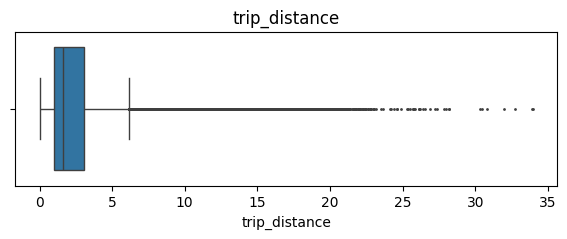

In [15]:
# trip distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(x = df['trip_distance'], fliersize = 1)
plt.show()

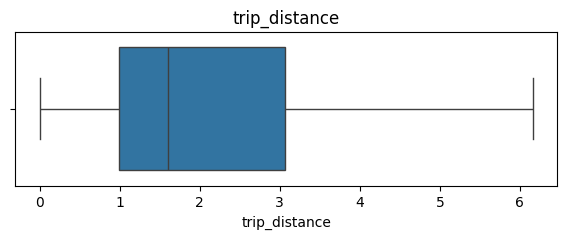

In [16]:
# removal the Outliers from trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(x = df['trip_distance'], fliersize = 1, showfliers = False)
plt.show()

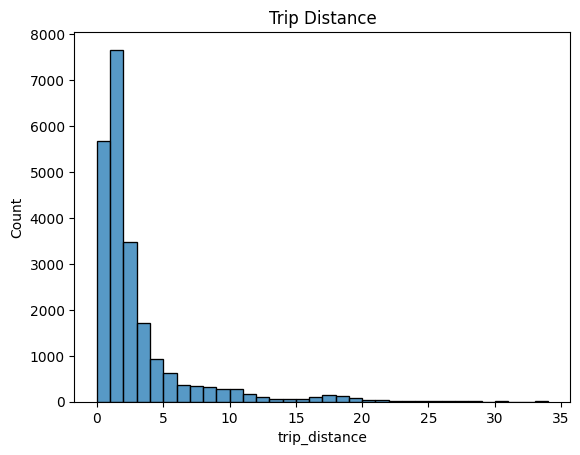

In [17]:
# histogram
sns.histplot(df['trip_distance'], 
             binrange=(math.floor(min(df['trip_distance'])), math.ceil(max(df['trip_distance']))), binwidth=1)
plt.title('Trip Distance')
plt.show()

#### total amount

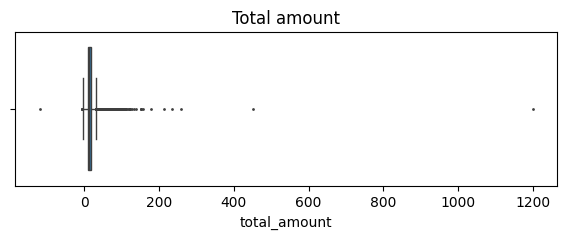

In [18]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['total_amount'], fliersize = 1)
plt.title('Total amount')
plt.show()

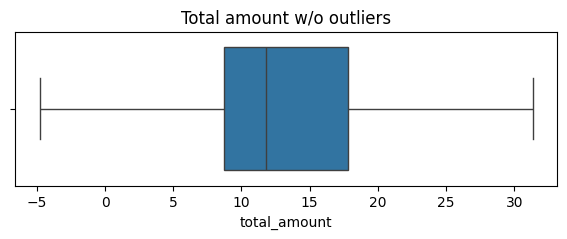

In [19]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['total_amount'], showfliers = False)
plt.title('Total amount w/o outliers')
plt.show()

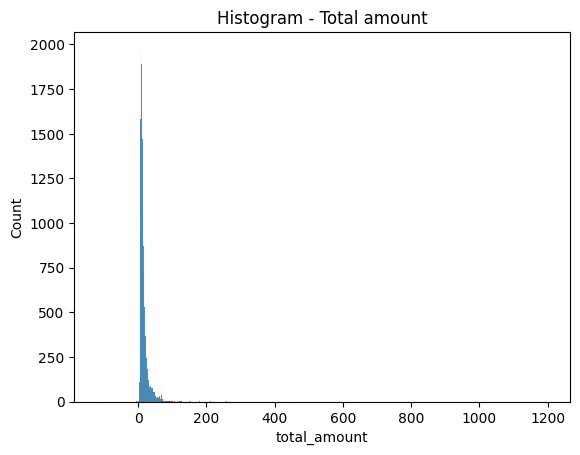

In [20]:
sns.histplot(df['total_amount'], 
             binrange=(math.floor(min(df['total_amount'])),math.ceil(max(df['total_amount']))), binwidth = 1)
plt.title('Histogram - Total amount')
plt.show()

### tip amount

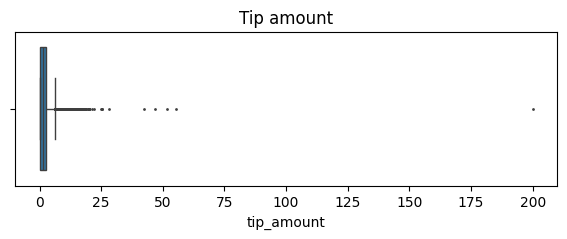

In [21]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['tip_amount'], fliersize =1)
plt.title('Tip amount')
plt.show()

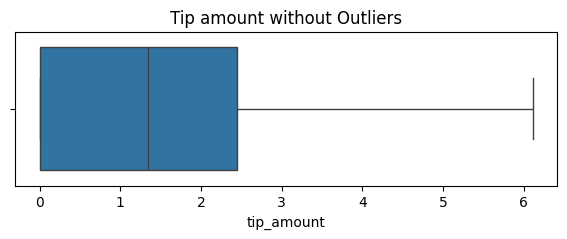

In [33]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df['tip_amount'], showfliers=False)
plt.title('Tip amount without Outliers')
plt.show()

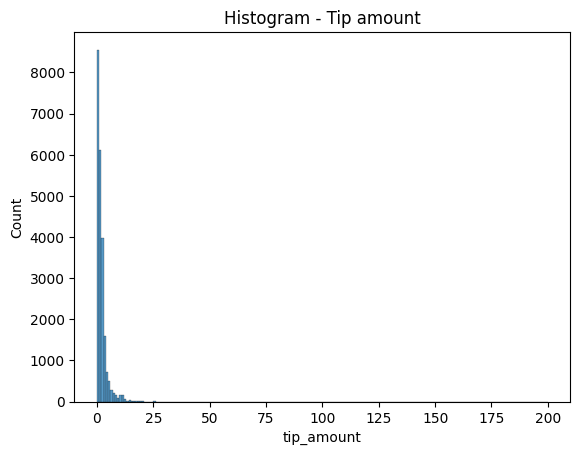

In [22]:
sns.histplot(df['tip_amount'], 
             binrange=(math.floor(min(df['tip_amount'])),math.ceil(max(df['tip_amount']))), binwidth = 1)
plt.title('Histogram - Tip amount')
plt.show()

#### Tip amount by vendor

In [23]:
df.groupby('VendorID').size()

VendorID
1    10073
2    12626
dtype: int64

In [24]:
df['VendorID'].value_counts(normalize = True).apply(lambda x: f'{x:.2%}')

VendorID
2    55.62%
1    44.38%
Name: proportion, dtype: object

In [25]:
df[['VendorID','tip_amount']].groupby('VendorID').mean()

,tip_amount
VendorID,
1,1.83725
2,1.83461


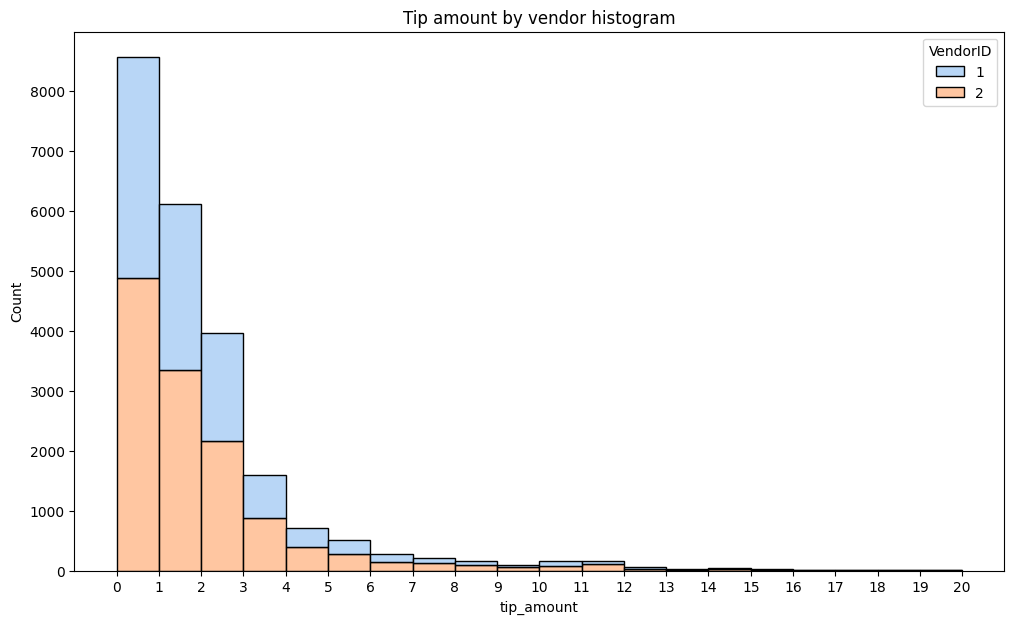

In [26]:
# Create histogram of tip_amount by vendor
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df, x='tip_amount', bins = range(0,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                  palette = 'pastel')
ax.set_xticks(range(0, 21, 1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram')
plt.show()

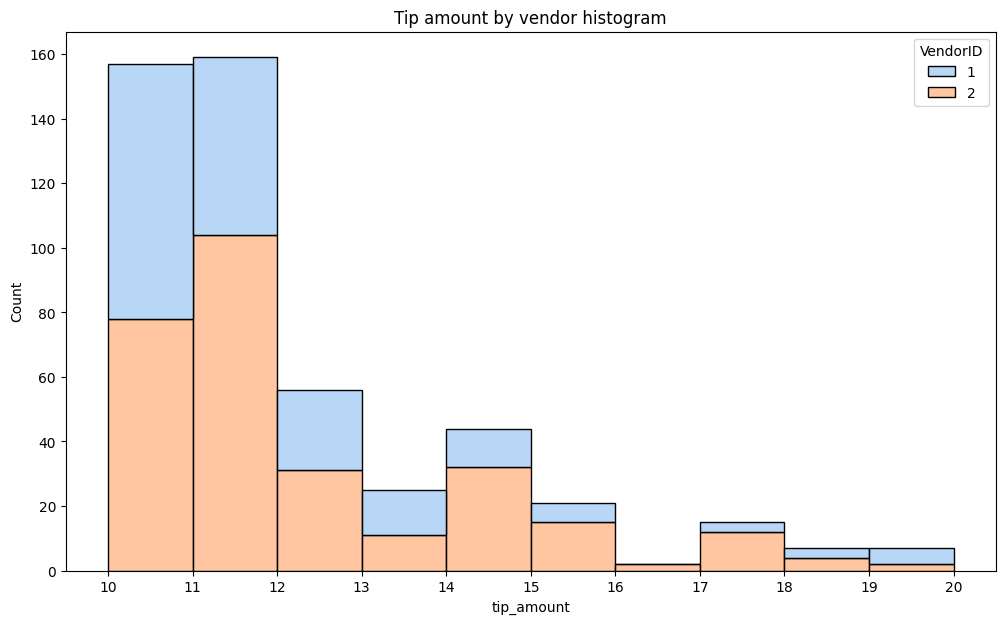

In [27]:
# Create histogram of tip_amount by vendor for tips > $10
tips_over_10 = df[df['tip_amount'] >= 10]

plt.figure(figsize = (12,7))
ax = sns.histplot(data = tips_over_10, x='tip_amount', bins = range(10,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                  palette = 'pastel')
ax.set_xticks(range(10, 21, 1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram')
plt.show()

#### Mean tips by passenger count

In [28]:
df.groupby(['passenger_count']).size()

passenger_count
0       33
1    16117
2     3305
3      953
4      455
5     1143
6      693
dtype: int64

In [29]:
df['passenger_count'].value_counts(normalize = True).apply(lambda x: f'{x:.2%}')

passenger_count
1    71.00%
2    14.56%
5     5.04%
3     4.20%
6     3.05%
4     2.00%
0     0.15%
Name: proportion, dtype: object

거의 2/3 이상이 홀로 탑승하는 경우이다. 탑승자 없는 말이안되는 경우도 발생했다.

In [30]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


In [31]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

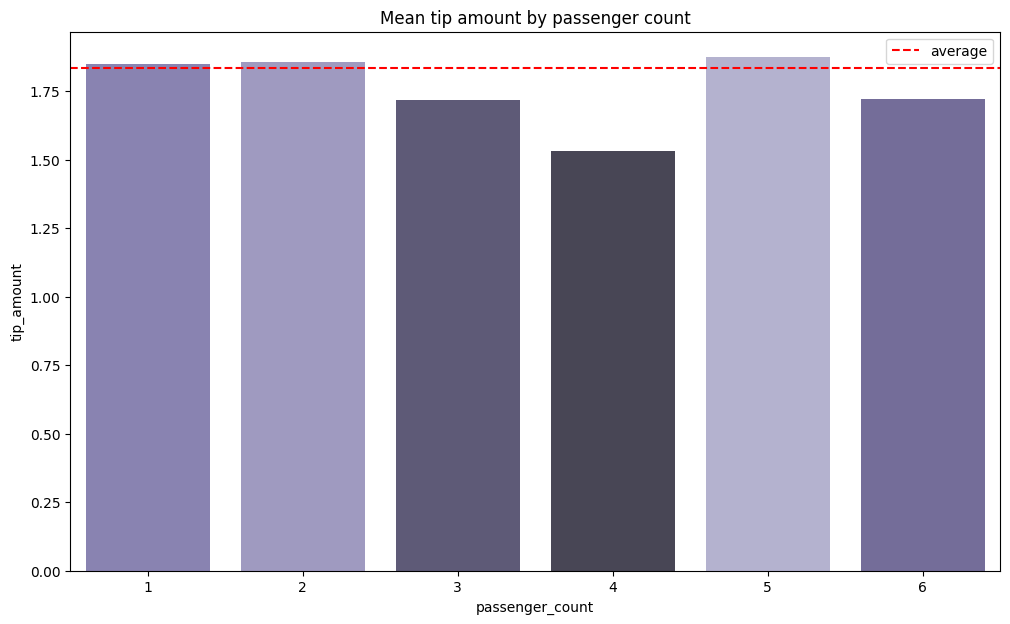

In [34]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count[mean_tips_by_passenger_count.index != 0]
pal = sns.color_palette("Purples_d", len(data))
rank = data['tip_amount'].argsort().argsort()
palette_list = list(np.array(pal[::-1])[rank])

plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index, y=data['tip_amount'], palette=palette_list)
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='average')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize = 12)
plt.show()

평균 tip 금액은 승객 수에 따라 거의 변하지 않는다. 비록 승객이 4명일때 평균 tip_amount가 감소했으나, data set에서 승객 4명이 탄경우가 가장 적었다.

#### Create month and day columns

In [38]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

#### Plot total ride count by month
월 별 전체 ride count를 확인해보기

In [39]:
# Get total number of rides for each month
monthly_total_number_of_ride = df['month'].value_counts()
monthly_total_number_of_ride

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [40]:
# Reorder the monthly ride list so months go in order
monthly_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_total_number_of_ride = monthly_total_number_of_ride.reindex(index = monthly_order)

In [41]:
monthly_total_number_of_ride

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

Text(0.5, 1.0, 'Ride count by month')

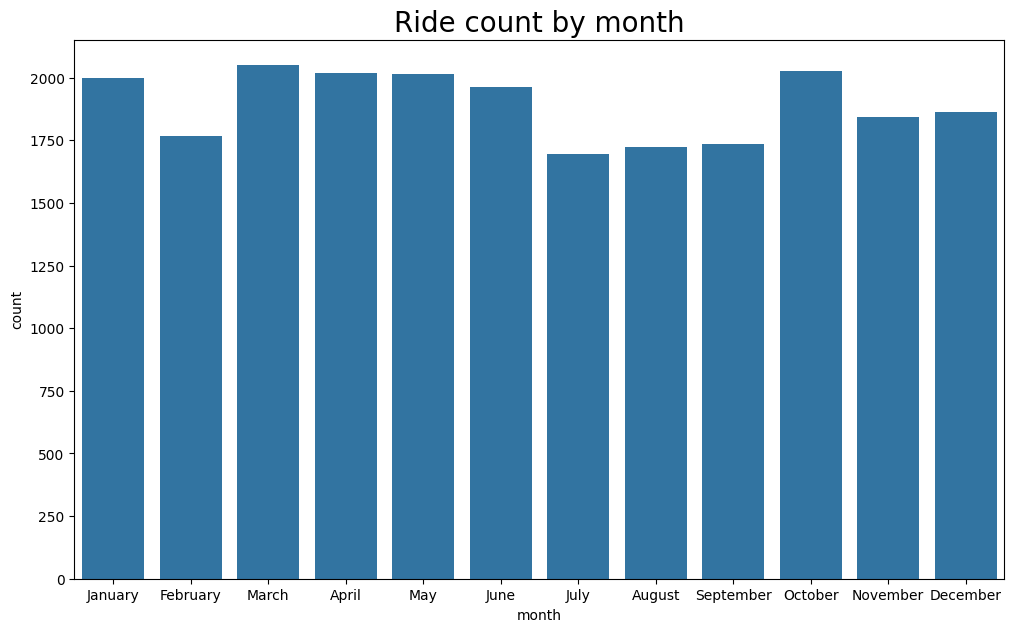

In [42]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_total_number_of_ride.index, y=monthly_total_number_of_ride)
plt.xticks(horizontalalignment = 'center')
plt.title('Ride count by month', fontsize=20)

월별 이용자 수는 거의 일정하다. 여름 시즌인 7, 8, 9월 과 2월에 감소폭이 눈에 띈다.

#### Plot total count by day
한주내 요일별 Trend를 확인해 보자

In [43]:
# Repeat the above process per day..
# Get total number of rides for each day
daily_total_number_of_ride = df['day'].value_counts()
# Reorder the daily ride list so days go in order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_total_number_of_ride = daily_total_number_of_ride.reindex(index = day_order)

In [44]:
daily_total_number_of_ride

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

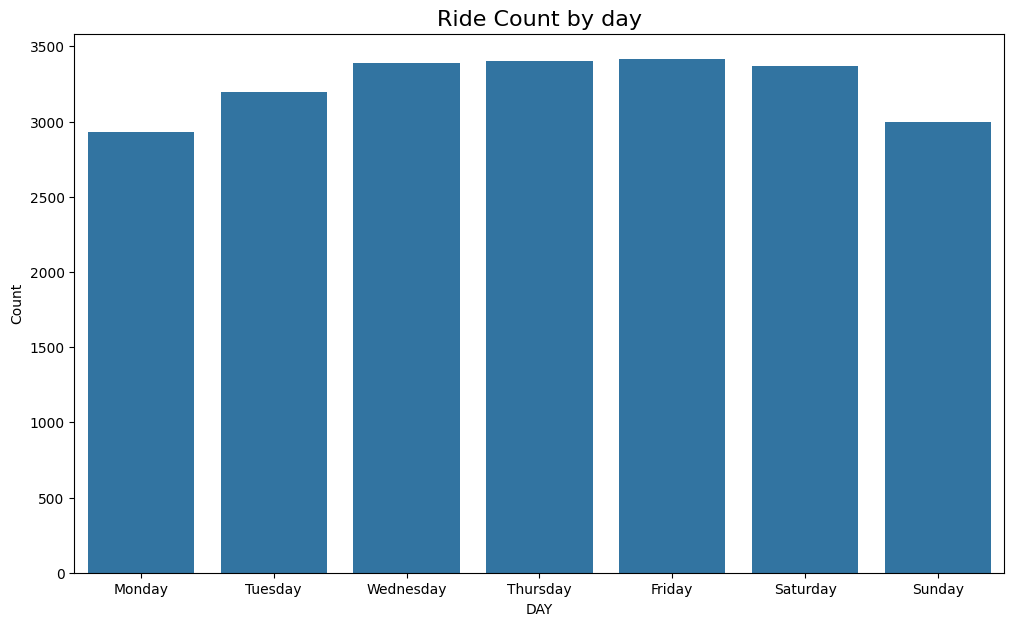

In [45]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_total_number_of_ride.index, y=daily_total_number_of_ride)
ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)
ax.set_xlabel('DAY')
ax.set_ylabel('Count')
plt.title('Ride Count by day', fontsize=16)
plt.show()

목요일 부터 토요일까지가 다른 요일에 비해 이용객 수가 많음을 확인할 수 있다.

#### Plot total revenue by month

In [53]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
total_amount_month = df.groupby('month').agg({'total_amount':'sum'})
total_amount_month = total_amount_month.reindex(index = month_order)
total_amount_month

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


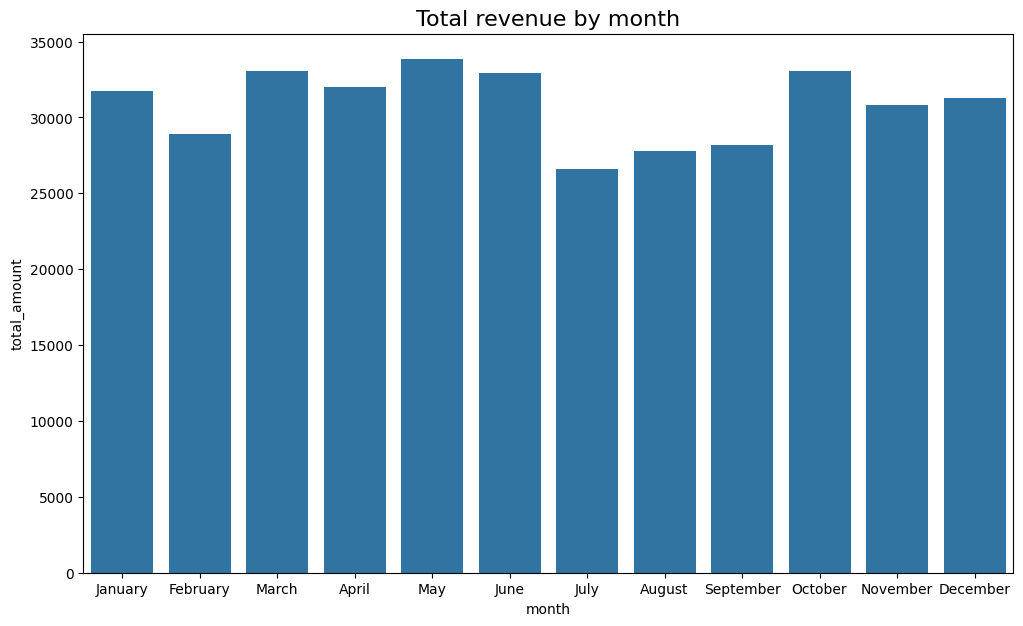

In [61]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'])
plt.title('Total revenue by month', fontsize=16)
plt.show()

#### Plot total revenue by day

In [55]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
total_amount_day = df.groupby('day').agg({'total_amount':'sum'})
total_amount_day=total_amount_day.reindex(index=day_order)
total_amount_day

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


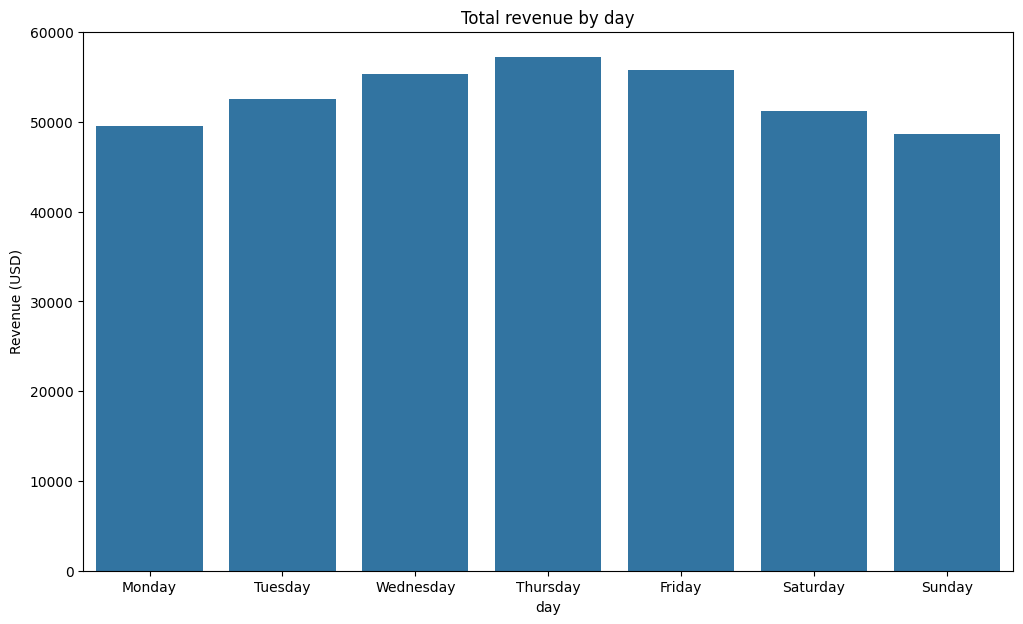

In [65]:
# Create a plot bar of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x = total_amount_day.index, y=total_amount_day['total_amount'])
plt.ylabel('Revenue (USD)')
plt.title('Total revenue by day')
plt.show()

이용객 수 와 동일한 패턴의 매출 경향을 보이고 있다.

## Tableau visualization

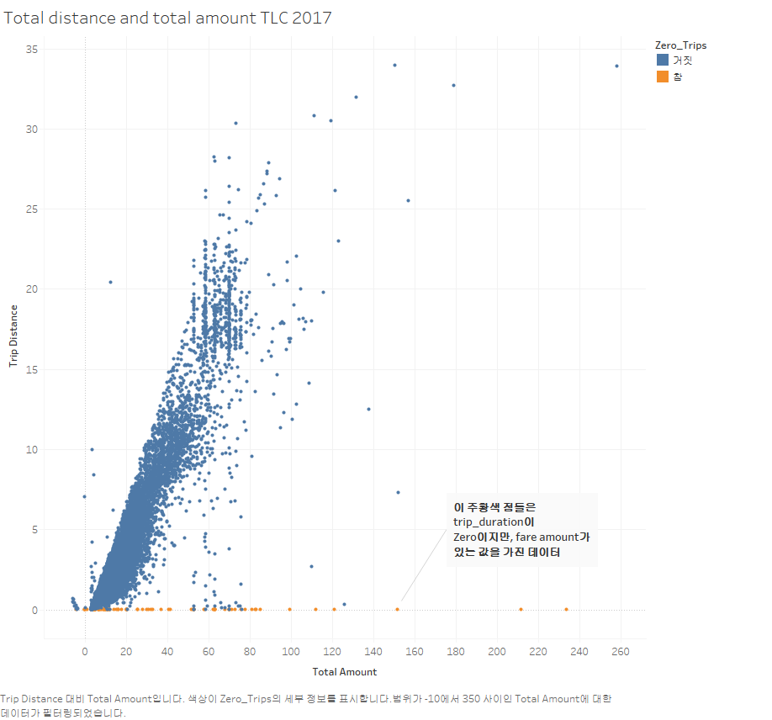

In [72]:
Image('./image/Course_3_Automatidata _image.png')

#### Plot mean trip distance by drop-off location

In [75]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [81]:
# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = df.groupby('DOLocationID').agg({'trip_distance':'mean'})

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values(by='trip_distance')
distance_by_dropoff

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


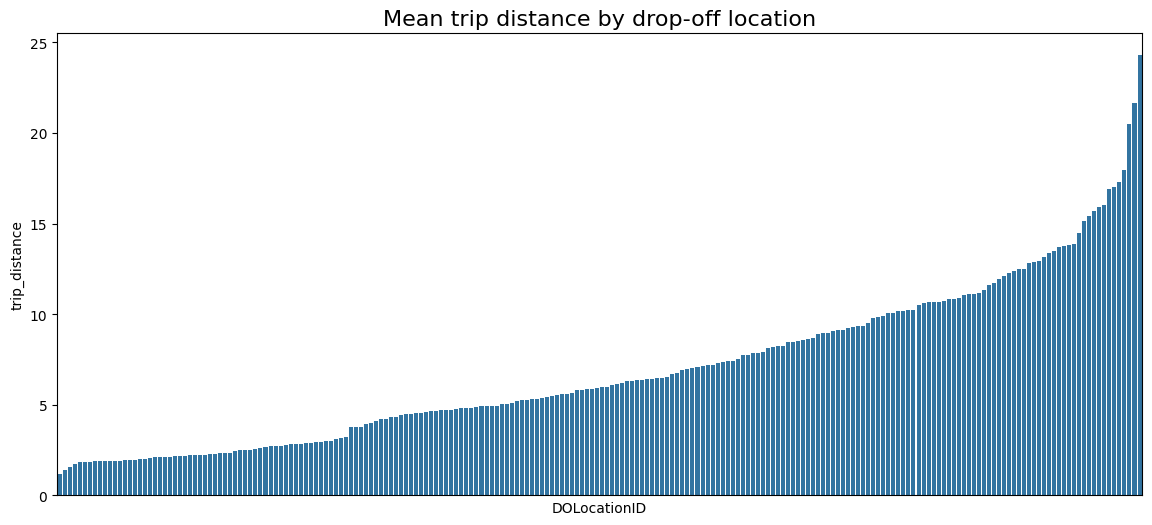

In [89]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, y=distance_by_dropoff['trip_distance'],
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

이 그래프는 정규 분포의 누적 밀도 함수와 관련된 특성 곡선을 나타냅니다. 즉, 하락 지점이 지형에 상대적으로 고르게 분포되어 있다는 것을 나타내며, 이는 지리적 좌표가 이 데이터셋에 포함되어 있지 않아 위치 분포를 검증할 명확한 방법이 없었기 때문에 알아두면 좋은 정보 입니다.

이 결론을 확인하기 위해 다음 실험을 고려해 봅니다.:
* 평균이 10이고 표준편차가 5인 정규 분포에서 1500쌍의 점을 생성하는 샘플을 만듭니다.
* 각 점 쌍 사이의 거리를 계산합니다.
* 좌표들 끝점별로 그룹화하고 그 끝점과 그것과 짝을 이룬 모든 다른 점들 사이의 평균거리를 계산합니다.
* 각 고유한 끝점에 대한 평균 거리를 그래프로 나타냅니다.

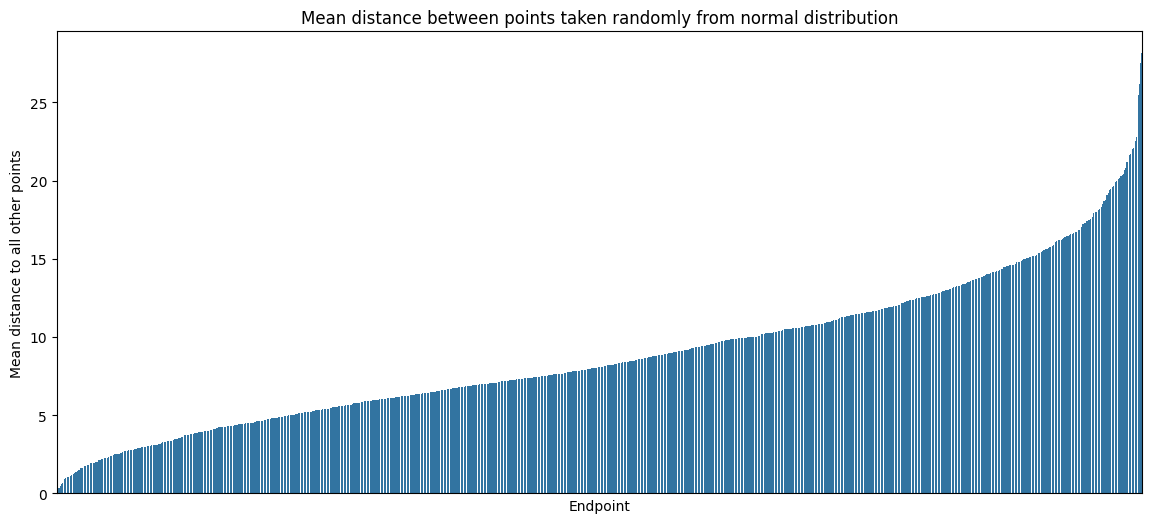

In [8]:
# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 인덱스를 열로 포함하여 리셋
data_reset = data.reset_index()

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data_reset.index,
                 y='distance',
                 data = data_reset)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

이 그래프로 설명된 곡선은 각 택시 승차가 각 하차 위치까지 이동한 평균 거리와 거의 동일합니다. 이것은 택시 데이터 세트의 하차 위치들이 지리적으로 균등하게 분포되어 있음을 나타냅니다. 그러나, 이것이 각 하차점마다 승차 분포가 균등했다는 의미는 아닙니다. 다음 사항들을 검토해 봅니다.

##### Histogram of rides by drop-off location
먼저, 하차 위치 ID가 연속적으로 번호가 매겨져 있는지 확인합니다. 예를들어 1,2,3,4... 로 이어지는지, 아니면 일부 숫자가 누락되있는지 (예. 1,3,4,6,...)확인합니다. 번호가 모두 연속적이지 않다면, 히스토그램 일부 위치에 승차가 매우 적거나 전혀없는 것처럼 보일 수 있지만, 실제로 위치가 없기 때문에 막대가 없습니다.
이를 확인하는 여러가지 방법이 있습니다.

In [10]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID']))

49

하차위치를 나타내지 않는 숫자가 49개가 있습니다.
이러한 누락된 숫자가 히스토그램에 공간을 만드는 것을 제거하기 위해, 고유한 하차 위치 값들을 정렬한 다음 문자열로 변환합니다. 이렇게 하면 histplot 함수가 모든 막대를 서로 바로 옆에 표시하도록 합니다.

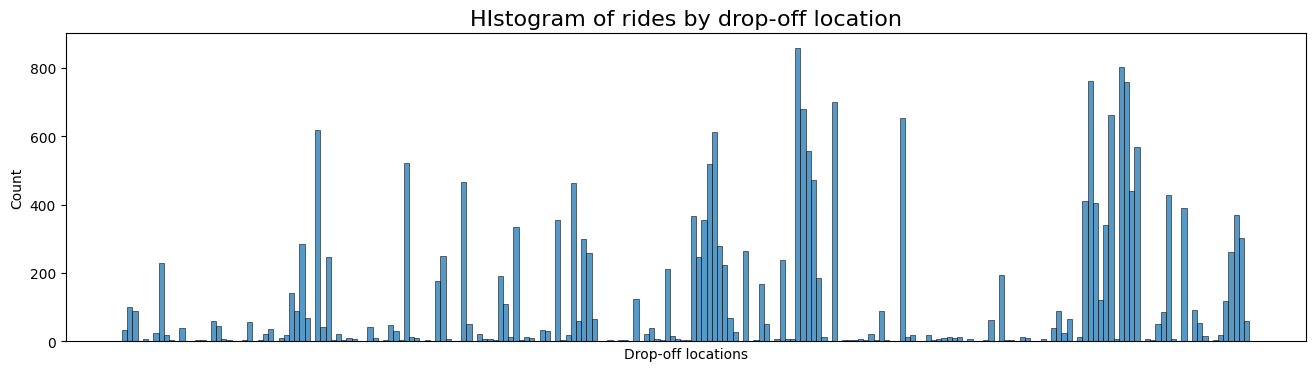

In [13]:
plt.figure(figsize = (16,4))
#DOLocationID column is numberic, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins = range(0,df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('HIstogram of rides by drop-off location', fontsize=16)
plt.show()

200개 이상의 하차위치 중에서, 상당수의 위치가 고빈도를 나타냅니다. 이러한 위치들은 엠파이어 스테이트빌딩이나 타임스퀘어 같은 인기 있는 관광명소, 공항, 그리고 기차 및 버스터미널 근처일 가능성이 있습니다. 각 ID가 해당하는 위치를 알 수 있다면 도움이 될 것이지만 불행하게도 이 정보는 데이터에 없습니다.

#### Trip duration

In [18]:
dropoff_time = pd.to_datetime(df['tpep_dropoff_datetime'])
pickup_time = pd.to_datetime(df['tpep_pickup_datetime'])
trip_duration = dropoff_time - pickup_time

In [21]:
trip_duration.describe()

count                        22699
mean     0 days 00:17:00.826600290
std      0 days 01:01:59.788923306
min              -1 days +23:43:01
25%                0 days 00:06:39
50%                0 days 00:11:11
75%                0 days 00:18:23
max                0 days 23:59:33
dtype: object

평균 여행 소요시간은 대략 17분이다. 표준편차가 대략 62분이라는 점을 감안하면 굉장히 넓은 분포를 가지고 있다고 볼 수있다. 이는 대부분의 trip이 17분내외로 매우 짧지만 적은 수위 매우 긴 trip이 존재함을 의미한다. 가장 짧은 trip이 마이너스 시간인다 (-1day +23:43:01) 이는 데이터 에러를 의미할 수 있다. trip duration은 음수일 수 없다.